In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# data importing

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head(3)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5


In [5]:
#EDA

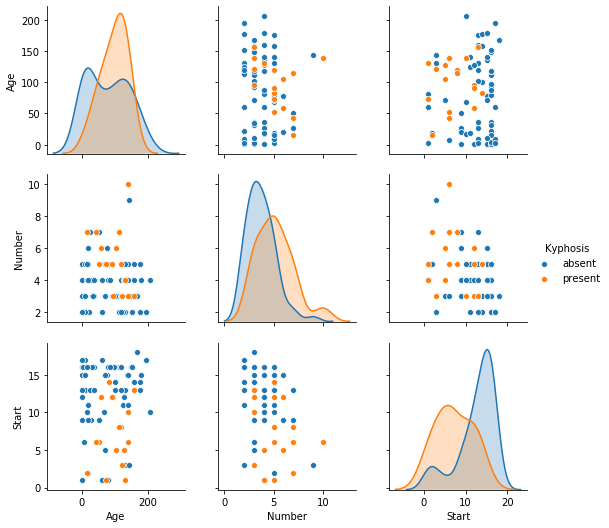

In [6]:
sns.pairplot(df,hue='Kyphosis')

In [7]:
# Train_test_Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [11]:
#Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier(criterion = 'entropy')

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
# Prediction

In [16]:
predictions=dtree.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [18]:
conf_matrix=confusion_matrix(y_test,predictions)
accuracy=accuracy_score(y_test,predictions)

In [19]:
conf_matrix,accuracy

(array([[17,  3],
        [ 2,  3]], dtype=int64), 0.8)

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.89      0.85      0.87        20
     present       0.50      0.60      0.55         5

    accuracy                           0.80        25
   macro avg       0.70      0.72      0.71        25
weighted avg       0.82      0.80      0.81        25



In [22]:
# Tree Visulizations

In [24]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

C:\Users\ashish\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


['Age', 'Number', 'Start']

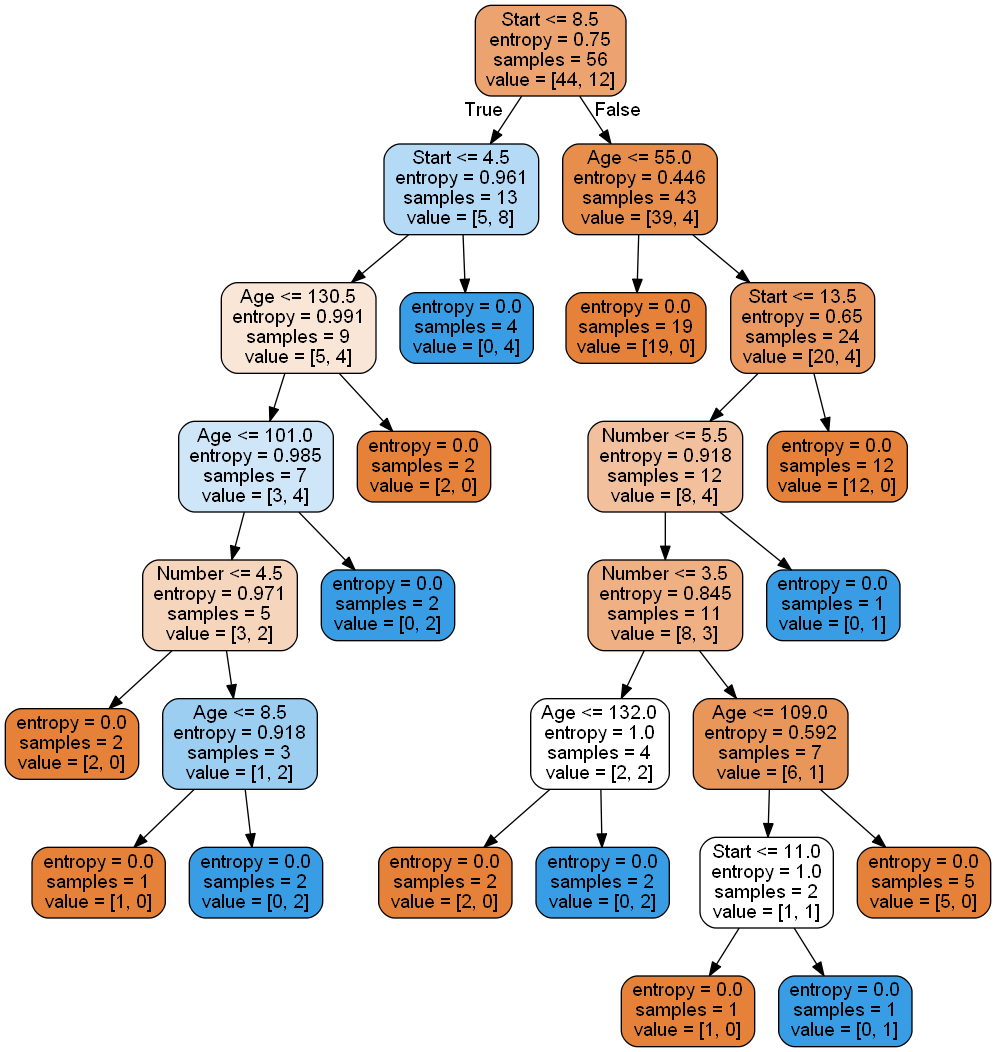

In [40]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier 

In [43]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
rfc=RandomForestClassifier(n_estimators=100)

In [45]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
rfc_pred=rfc.predict(X_test)

In [48]:
confusion_matrix(y_test,rfc_pred) 

array([[20,  0],
       [ 2,  3]], dtype=int64)

In [49]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.91      1.00      0.95        20
     present       1.00      0.60      0.75         5

    accuracy                           0.92        25
   macro avg       0.95      0.80      0.85        25
weighted avg       0.93      0.92      0.91        25



# Decision_Tree_Classification

In [4]:
df_1 = pd.read_csv("salaries.csv")
df_1.head(2)

<IPython.core.display.Javascript object>

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0


In [6]:
df_1.isnull().sum().sum()

0

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
company                  16 non-null object
job                      16 non-null object
degree                   16 non-null object
salary_more_then_100k    16 non-null int64
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


In [23]:
inputs=df_1.drop('salary_more_then_100k', axis=1)

In [24]:
target=df_1['salary_more_then_100k']

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
lab_company=LabelEncoder()
lab_job=LabelEncoder()
lab_degree=LabelEncoder()

In [27]:
inputs['company_n']=lab_company.fit_transform(inputs.company)
inputs['job_n']=lab_job.fit_transform(inputs.job)
inputs['degree_n']=lab_degree.fit_transform(inputs.degree)

In [29]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [31]:
inputs_n.head(1)

,company_n,job_n,degree_n
0,2,2,0


In [32]:
# Model_Decision_Tree

In [33]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [35]:
model.fit(inputs_n,target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
model.score(inputs_n,target)

1.0

In [37]:
# Is salary of Google, Computer Engineer, Bachelors degree > 100 k

In [38]:
model.predict([[2,1,0]])

array([0], dtype=int64)

In [40]:
#Is salary of Google, Computer Engineer, Masters degree > 100 k ?

In [41]:
model.predict([[2,1,1]])

array([1], dtype=int64)

# Decision_Tree_Classification-Titanic_Data_Set

In [42]:
df_2=pd.read_csv("titanic.csv")

<IPython.core.display.Javascript object>

In [43]:
df_2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [44]:
# removing the un-needed columns

In [45]:
df_2.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis=1, inplace=True)

In [46]:
df_2.head(2)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833


In [47]:
inputs=df_2.drop('Survived',axis=1)

In [48]:
target=df_2.Survived

In [49]:
inputs.head(2)

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833


In [50]:
# transform Sex_columns into cateogrical

In [53]:
inputs.Sex=inputs.Sex.map({'male':1,'female':2})

In [54]:
inputs.isna().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [55]:
# Addressing_ Missing_values

In [56]:
inputs.Age=inputs.fillna(inputs.Age.mean())

In [57]:
inputs.isna().sum().sum()

0

In [58]:
#Train_test_Split_DataSet

In [59]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(inputs,target,test_size=0.2)

In [60]:
# Model_Building

In [61]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [62]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
model.score(X_train,y_train)

0.9073033707865169

In [68]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [69]:
dc_pred=model.predict(X_test)

In [70]:
confusion_matrix(y_test,dc_pred) 

array([[97,  9],
       [22, 51]], dtype=int64)

In [71]:
accuracy_score(y_test,dc_pred)

0.8268156424581006

In [73]:
(97+51)/97+9+22+51

83.5257731958763